In [1]:
import numpy as np
import pandas as pd

wines = pd.read_csv('datasets/wine.csv')

sample = wines.sample(10)
sample

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
43,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,0
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630,2
51,13.83,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265,0
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,0
139,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590,2
124,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380,1
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630,2
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,1
54,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060,0


In [2]:
# Count number of missing values
wines.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

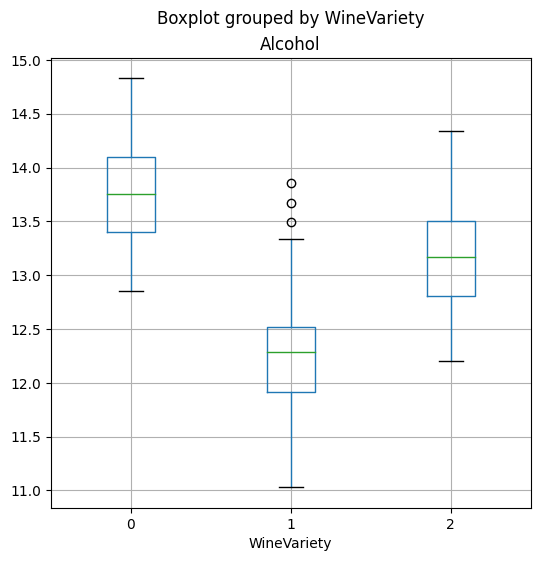

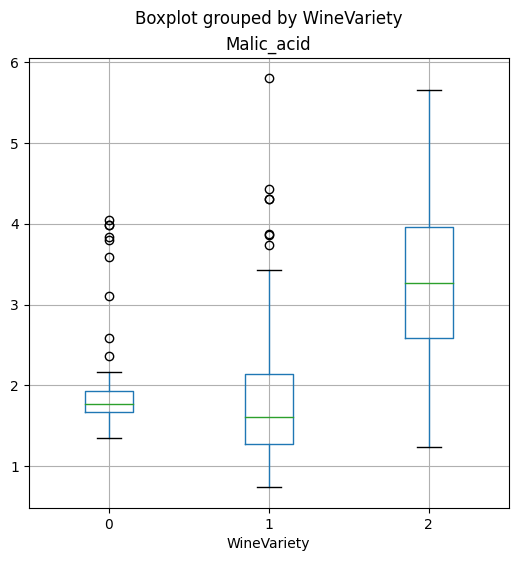

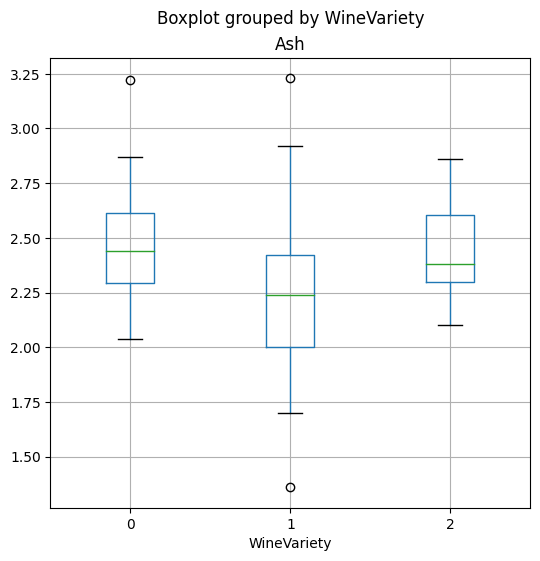

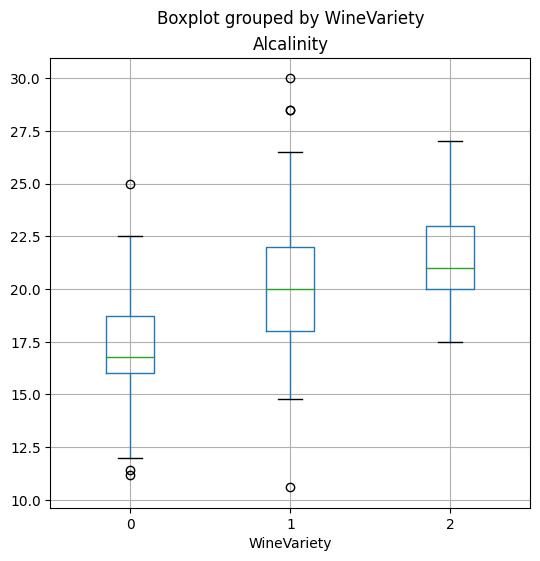

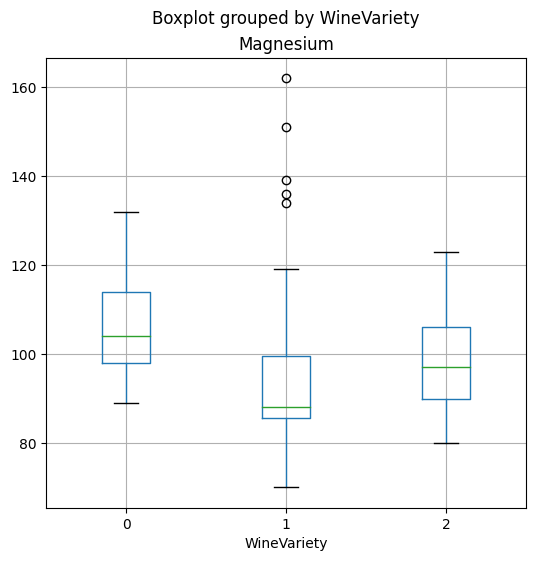

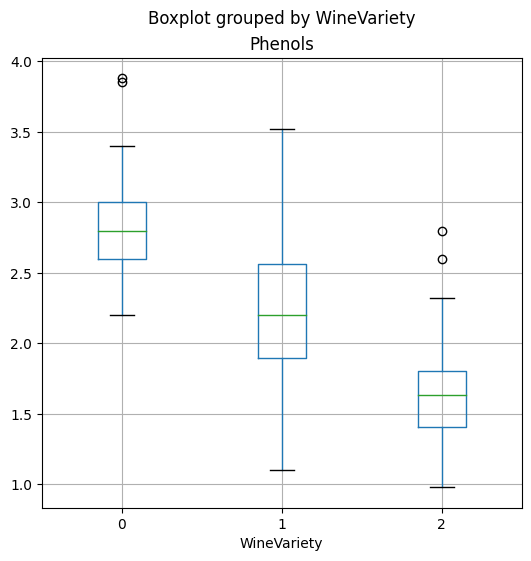

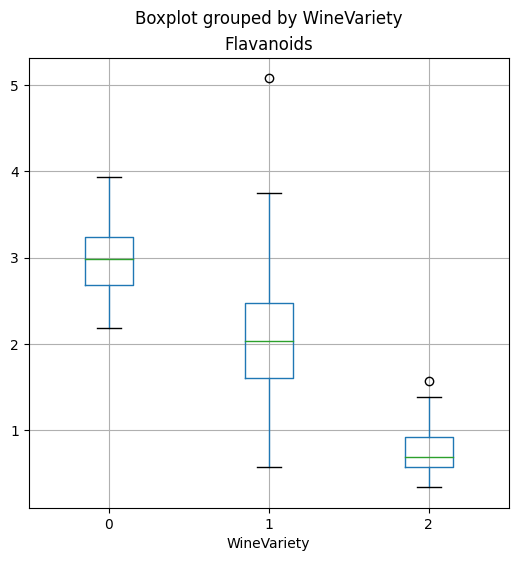

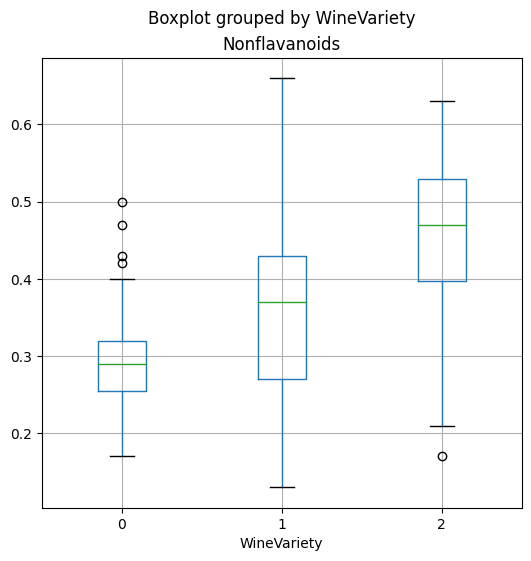

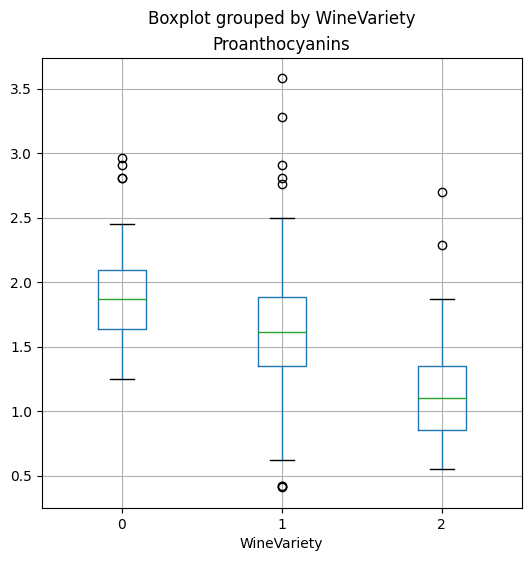

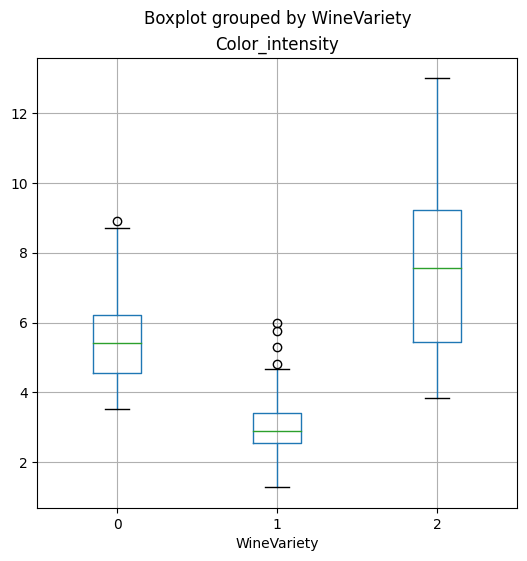

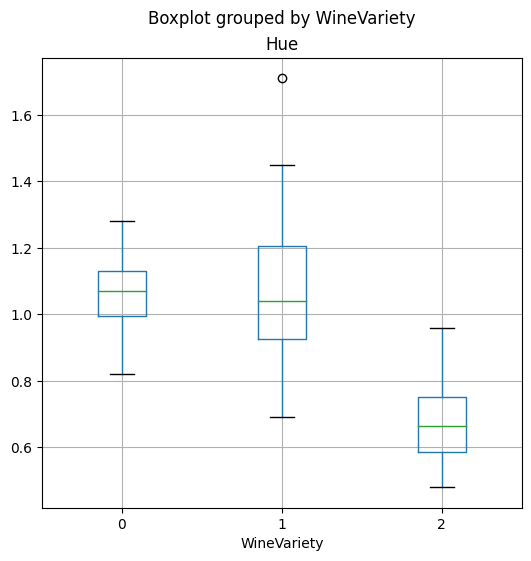

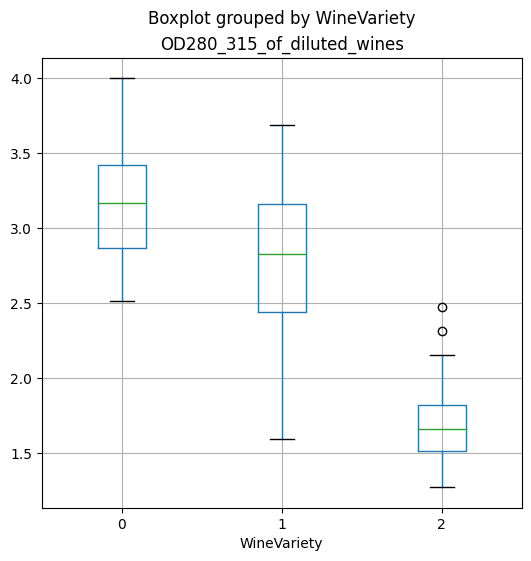

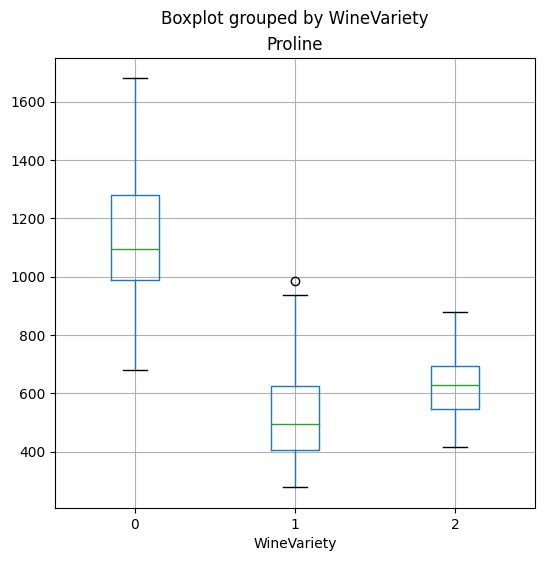

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

wine_classes = ["Variety A", "Variety B", "Variety C"]

wine_features = [col for col in wines.columns[:-1]]
wine_label = 'WineVariety'
for col in wine_features:
    wines.boxplot(column=col,by=wine_label,figsize=(6,6))
    plt.title(col)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# Separate feature and labels
wines_X, wines_y = wines[wine_features].values, wines[wine_label].values

# Split the data 70%-30% into training set and test set
x_wine_train, x_wine_test, y_wine_train, y_wine_test = train_test_split(wines_X, wines_y, test_size=0.3, stratify=wines_y,random_state=0)

print(f"Training set: {x_wine_train.shape[0]}\nTest set: {x_wine_test.shape[0]}")

Training set: 124
Test set: 54


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,recall_score,precision_score,roc_auc_score,roc_curve

feature_columns = [i for i in range(0,13)]
feature_transformer = Pipeline(steps=[
    ('scaler',StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess',feature_transformer,feature_columns)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier', SVC(probability=True))
])

multi_model = pipeline.fit(x_wine_train,y_wine_train)
print(multi_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])])),
                ('classifier', SVC(probability=True))])


Overall Accuracy: 1.0
Overall Precision 1.0
Overall Recall: 1.0


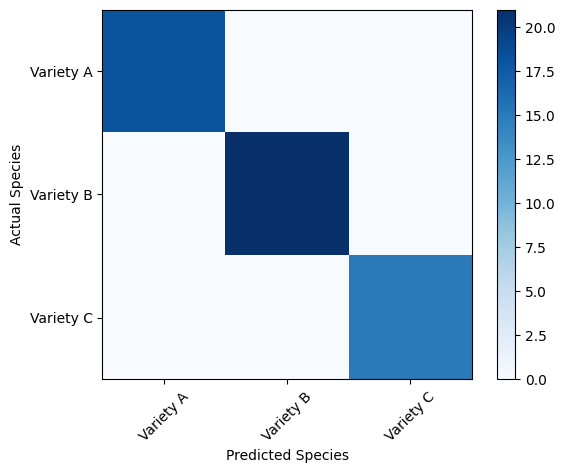

In [6]:
# Get predictions from test data
wine_predictions = multi_model.predict(x_wine_test)
wine_prob = multi_model.predict_proba(x_wine_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_wine_test,wine_predictions))
print("Overall Precision",precision_score(y_wine_test,wine_predictions,average='macro'))
print("Overall Recall:",recall_score(y_wine_test,wine_predictions,average='macro'))
#print("Average AUC:",roc_auc_score(y_wine_test,wine_predictions,multi_class='ovr'))


# Confusion matrix
mcm = confusion_matrix(y_wine_test,wine_predictions)

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(wine_classes))
plt.xticks(tick_marks, wine_classes, rotation=45)
plt.yticks(tick_marks, wine_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()



Average AUC: 1.0


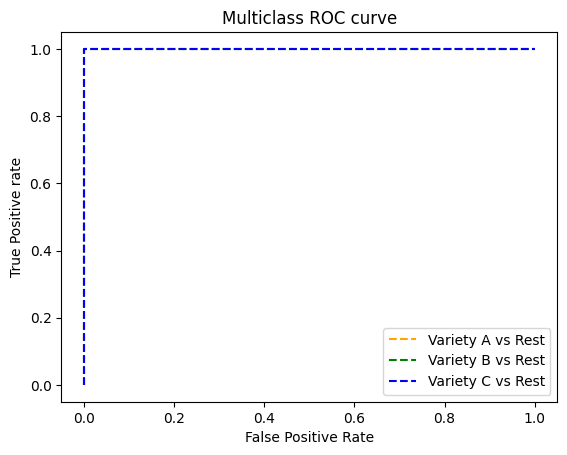

In [8]:

# Get class probability scores
probabilities = multi_model.predict_proba(x_wine_test)

auc = roc_auc_score(y_wine_test,probabilities, multi_class='ovr')
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(wine_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_wine_test, probabilities[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=wine_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=wine_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=wine_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [9]:
import joblib

# Save the model
filename = './wine_model.pkl'
joblib.dump(multi_model, filename)

['./wine_model.pkl']

In [10]:
multi_model = joblib.load(filename)

x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

print(f'New samples:\n{x_new}')

predictions = multi_model.predict(x_new)

for prediction in predictions:
    print(prediction, '('+ wine_classes[prediction] + ')')


New samples:
[[1.372e+01 1.430e+00 2.500e+00 1.670e+01 1.080e+02 3.400e+00 3.670e+00
  1.900e-01 2.040e+00 6.800e+00 8.900e-01 2.870e+00 1.285e+03]
 [1.237e+01 9.400e-01 1.360e+00 1.060e+01 8.800e+01 1.980e+00 5.700e-01
  2.800e-01 4.200e-01 1.950e+00 1.050e+00 1.820e+00 5.200e+02]]
0 (Variety A)
1 (Variety B)
